# Imports

In [1]:
import museval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
accuracy = [0, 1, 2, 3, 4]#' , 5, 6]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_list = []
accuracies_list = []
for n in names:
    sdrs = []
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_method/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs.append(results.agg_frames_tracks_scores()['drums']['SDR'])

    sdrs_list.append(sdrs)
    accuracies_list.append(accuracy)
sdrs_list_channels = sdrs_list

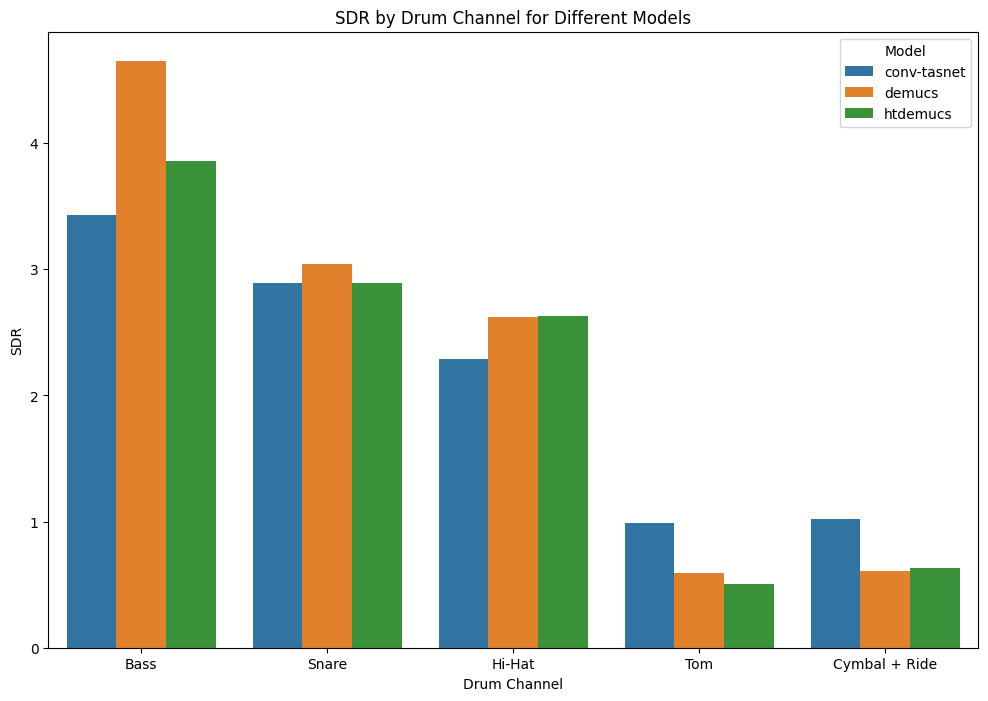

In [3]:
channels = ['Bass', 'Snare', 'Hi-Hat', 'Tom', 'Cymbal + Ride']
models = ['conv-tasnet', 'demucs', 'htdemucs']

data_channels = {
    'Drum Channel': channels * len(models),
    'SDR': sdrs_list_channels[0] + sdrs_list_channels[1] + sdrs_list_channels[2],
    'Model': ['conv-tasnet'] * len(channels) + ['demucs'] * len(channels) + ['htdemucs'] * len(channels)
}

df_channels = pd.DataFrame(data_channels)

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df_channels, x='Drum Channel', y='SDR', hue='Model')

# Adding labels and title
plt.xlabel('Drum Channel')
plt.ylabel('SDR')
plt.title('SDR by Drum Channel for Different Models')
plt.legend(title='Model')
# plt.grid(True)

# Show plot
plt.show()

In [4]:
df_channels

,Drum Channel,SDR,Model
0,Bass,3.432805,conv-tasnet
1,Snare,2.895067,conv-tasnet
2,Hi-Hat,2.287758,conv-tasnet
3,Tom,0.989435,conv-tasnet
4,Cymbal + Ride,1.023865,conv-tasnet
5,Bass,4.650735,demucs
6,Snare,3.043845,demucs
7,Hi-Hat,2.624292,demucs
8,Tom,0.593205,demucs
9,Cymbal + Ride,0.611340,demucs


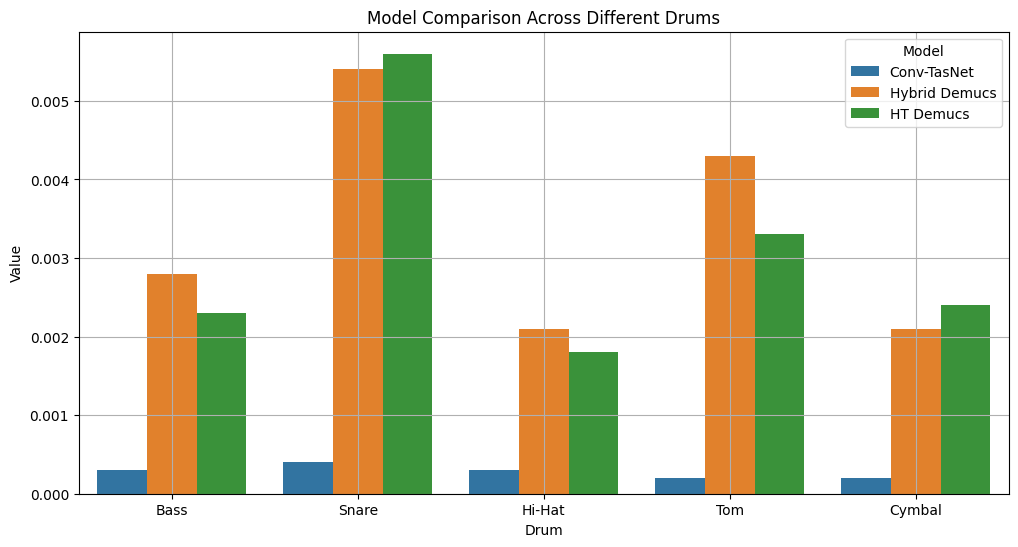

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
data = {
    'Model': ['Conv-TasNet', 'Hybrid Demucs', 'HT Demucs'],
    # 'Left Audio': [0.0032, 0.0342, 0.0154],
    # 'Right Audio': [0.0035, 0.0339, 0.0157],
    'Bass': [0.0003, 0.0028, 0.0023],
    'Snare': [0.0004, 0.0054, 0.0056],
    'Hi-Hat': [0.0003, 0.0021, 0.0018],
    'Tom': [0.0002, 0.0043, 0.0033],
    'Cymbal': [0.0002, 0.0021, 0.0024]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Melting the DataFrame for seaborn
df_melted = df.melt(id_vars='Model', var_name='Drum', value_name='Value')

# Plotting side by side bar charts
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Drum', y='Value', hue='Model')

# Adding labels and title
plt.xlabel('Drum')
plt.ylabel('Value')
plt.title('Model Comparison Across Different Drums')
plt.grid(True)

# Show plot
plt.show()


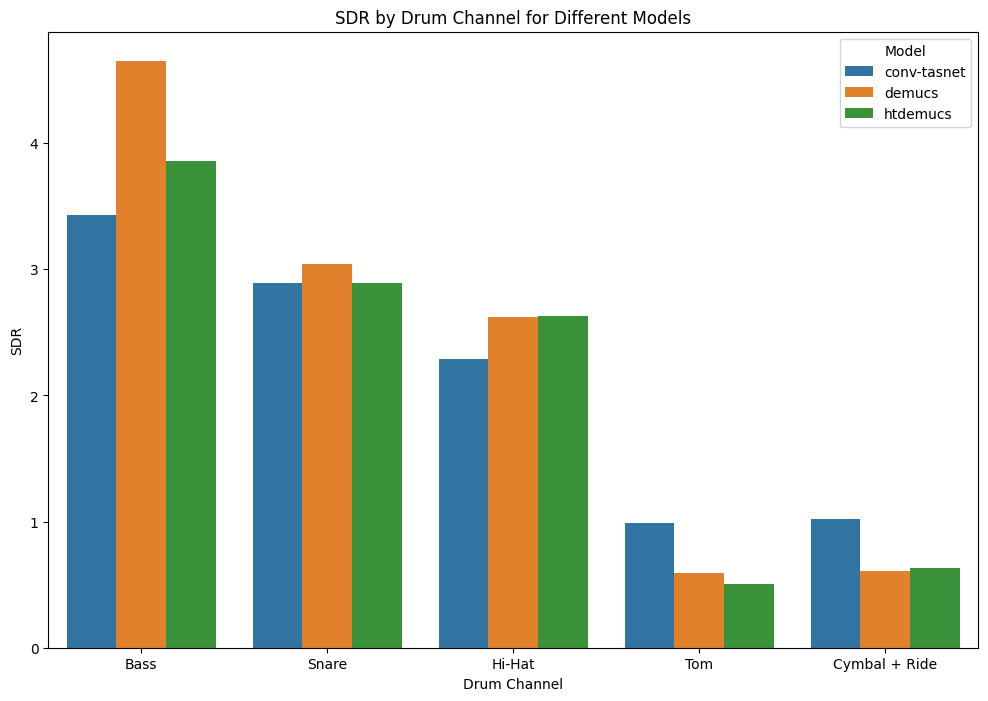

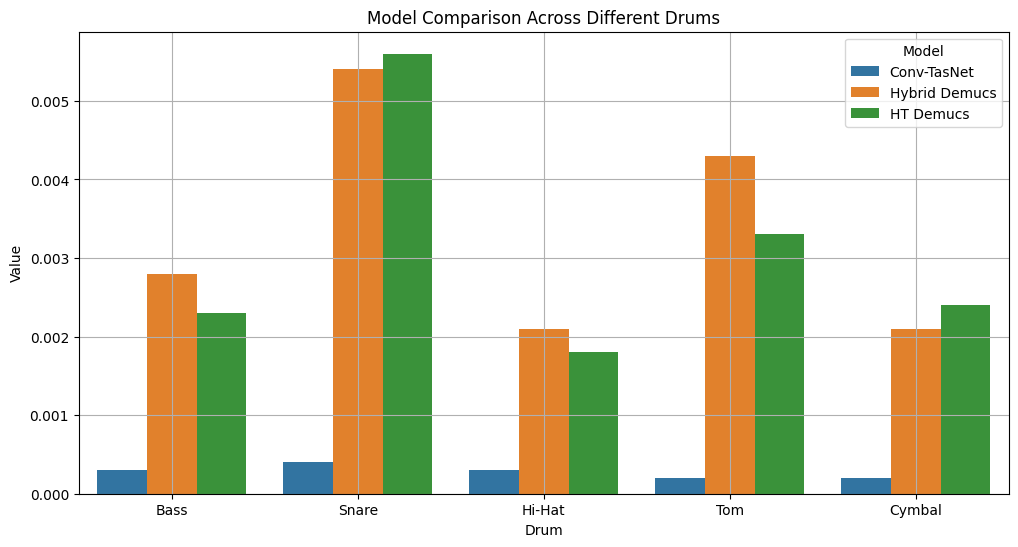

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df_channels, x='Drum Channel', y='SDR', hue='Model')

# Adding labels and title
plt.xlabel('Drum Channel')
plt.ylabel('SDR')
plt.title('SDR by Drum Channel for Different Models')
plt.legend(title='Model')

# Show plot
plt.show()

# Data for the second plot
data = {
    'Model': ['Conv-TasNet', 'Hybrid Demucs', 'HT Demucs'],
    'Bass': [0.0003, 0.0028, 0.0023],
    'Snare': [0.0004, 0.0054, 0.0056],
    'Hi-Hat': [0.0003, 0.0021, 0.0018],
    'Tom': [0.0002, 0.0043, 0.0033],
    'Cymbal': [0.0002, 0.0021, 0.0024]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Melting the DataFrame for seaborn
df_melted = df.melt(id_vars='Model', var_name='Drum', value_name='Value')

# Plotting side by side bar charts
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Drum', y='Value', hue='Model')

# Adding labels and title
plt.xlabel('Drum')
plt.ylabel('Value')
plt.title('Model Comparison Across Different Drums')
plt.grid(True)

# Show plot
plt.show()


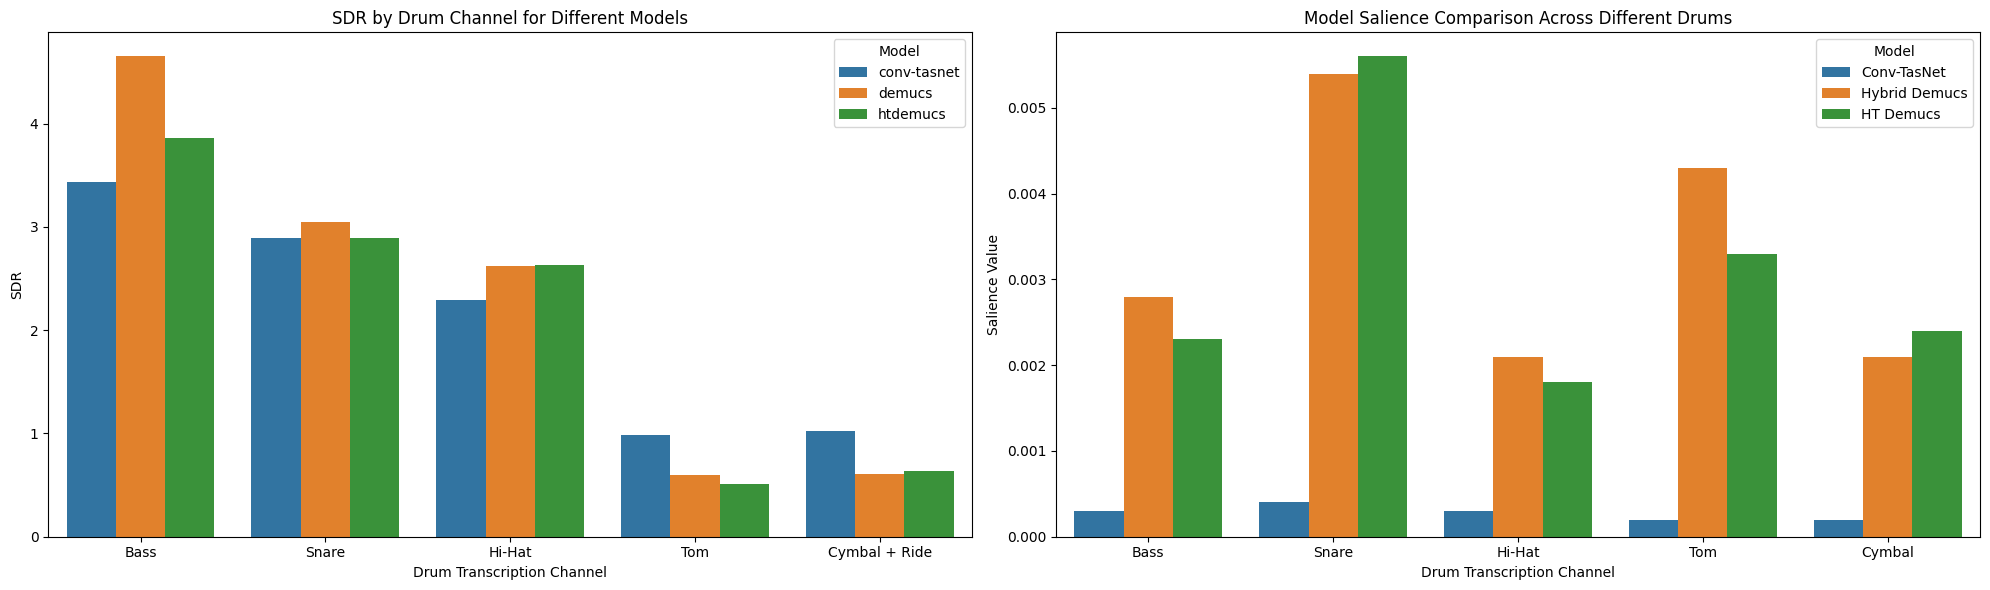

In [8]:
# Creating the subplots for the two bar charts side by side

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# First subplot: SDR by Drum Channel for Different Models
sns.barplot(data=df_channels, x='Drum Channel', y='SDR', hue='Model', ax=axs[0])
axs[0].set_xlabel('Drum Transcription Channel')
axs[0].set_ylabel('SDR')
axs[0].set_title('SDR by Drum Channel for Different Models')
axs[0].legend(title='Model')

# Second subplot: Model Comparison Across Different Drums
sns.barplot(data=df_melted, x='Drum', y='Value', hue='Model', ax=axs[1])
axs[1].set_xlabel('Drum Transcription Channel')
axs[1].set_ylabel('Salience Value')
axs[1].set_title('Model Salience Comparison Across Different Drums')

plt.tight_layout()
plt.show()
